#Закрепление знаний

Представлены данные об оттоке клиентов некоторого банка.



In [2]:
import pandas as pd

In [6]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Удаляем ненужный столбец 'RowNumber'

In [7]:
churn_data = churn_data.drop(labels='RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##ЗАДАНИЯ

###9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [43]:
exited_data = churn_data.groupby('Exited')['Exited'].count()
display(exited_data)

Exited
0    7963
1    2037
Name: Exited, dtype: int64

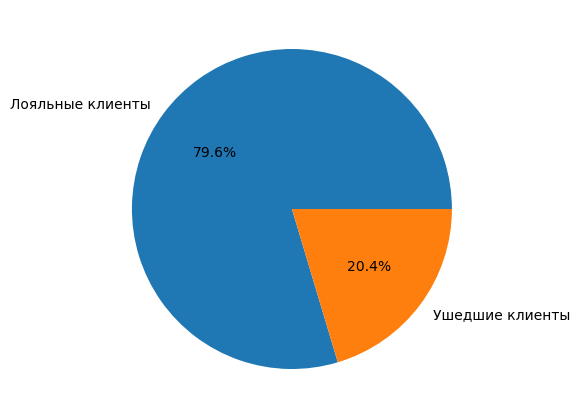

In [42]:
import plotly 
import matplotlib.pyplot as plt

plt.style.use('default')
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_data,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    
);

На диаграмме видно, что ушедших клиентов гораздо меньше, чем лояльных.

###9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [47]:
over_2500 = churn_data[churn_data['Balance']>2500]['Balance']
over_2500.head()

1     83807.86
2    159660.80
4    125510.82
5    113755.78
7    115046.74
Name: Balance, dtype: float64

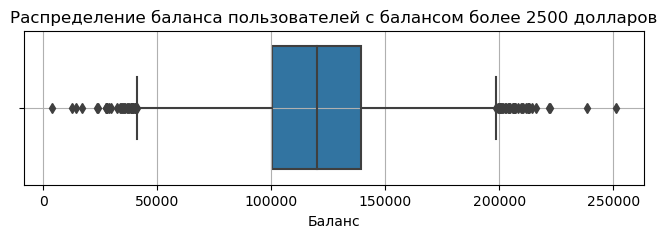

In [65]:
import seaborn as sns

fig = plt.figure(figsize=(8, 2))
boxplot = sns.boxplot(
    data=over_2500,
    x=over_2500.values,
    orient='h',
)
boxplot.set_title('Распределение баланса пользователей с балансом более 2500 долларов');
boxplot.set_xlabel('Баланс');
boxplot.grid()

Распределение значений баланса пользователей равномерное. Основная масса значений лежит в диапазоне от 40000 до 195000 долларов. Медианное значение баланса приблизительно 120000 долларов. Половина значений лежит в диапазоне 100000 - 1300000 долларов.

###9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

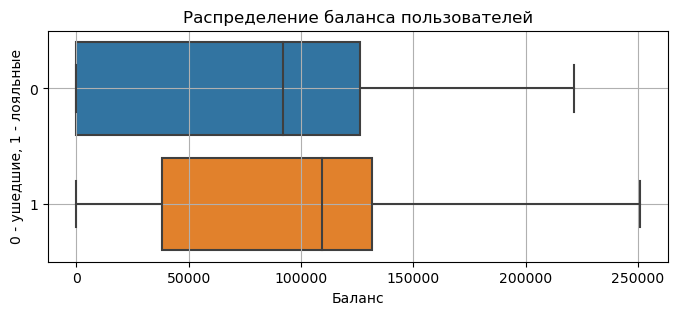

In [64]:
over_2500 = churn_data[churn_data['Balance']>2500]['Balance']
over_2500.head()



fig = plt.figure(figsize=(8, 3))
boxplot = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',    
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('0 - ушедшие, 1 - лояльные');
boxplot.grid()

Медианное значение баланса лояльных пользователей 110000 долааров, ушедших 90000 долларов. Условия банка могут быть менее выгодными для пользователей с балансом менее 100000 долларов.